# Project: Analyzing Macbeth

## Introduction
Now we're going to do some rudimentary analysis of Shakespeare's classic play: Macbeth! You will get practice working with lists and dictionaries, conditionals, visualizing data, and thinking analytically about data.

## Objectives
You will be able to:
* Apply string methods to make changes to a string
* Use a `for` loop to iterate over a collection
* Assign values in a dictionary

## Getting the Data
Here we start by importing a Python package called `requests`. We'll use it to pull the transcript of Macbeth from the [Project Gutenberg](https://www.gutenberg.org/) website. We'll also preview a few details about what is now stored in the variable `macbeth`. As you can see, it's a string with 120,253 characters - the first 500 of which are printed below. 

In [1]:
import requests
macbeth = requests.get('http://www.gutenberg.org/cache/epub/2264/pg2264.txt').text

print(type(macbeth))
print(len(macbeth))
# print(macbeth)

<class 'str'>
120253


## Your Task

Your task is to create a bar graph of the 25 most common words in Shakespeare's Macbeth.  


A common Python programming pattern to count objects, produce histograms, or update statistics is to make calls to a dictionary as you iterate through a list. For example, given a list of words, you can create a dictionary to store counts and then iterate through the list of words, checking how many times each word has appeared using your dictionary, and updating the dictionary count now that you've seen that word again. The `.get()` dictionary method is very useful in doing this. Read the docstring for the `.get()` method and use it along with the pseudocode below to create a bar graph of the 25 most common words from the transcript of Macbeth which has been loaded into the variable 'macbeth'. Be sure to include a title and appropriate labels for your graph.

To get the 25 *most common* words, you will have to sort your counts. If you are not super sure how to do this, checkout out the [Sorting HOW TO](https://docs.python.org/3/howto/sorting.html) Python documentation. Part of being a data scientist is figuring out how to do tasks that you may not have done before. Remember, in these situations, Google is your friend!

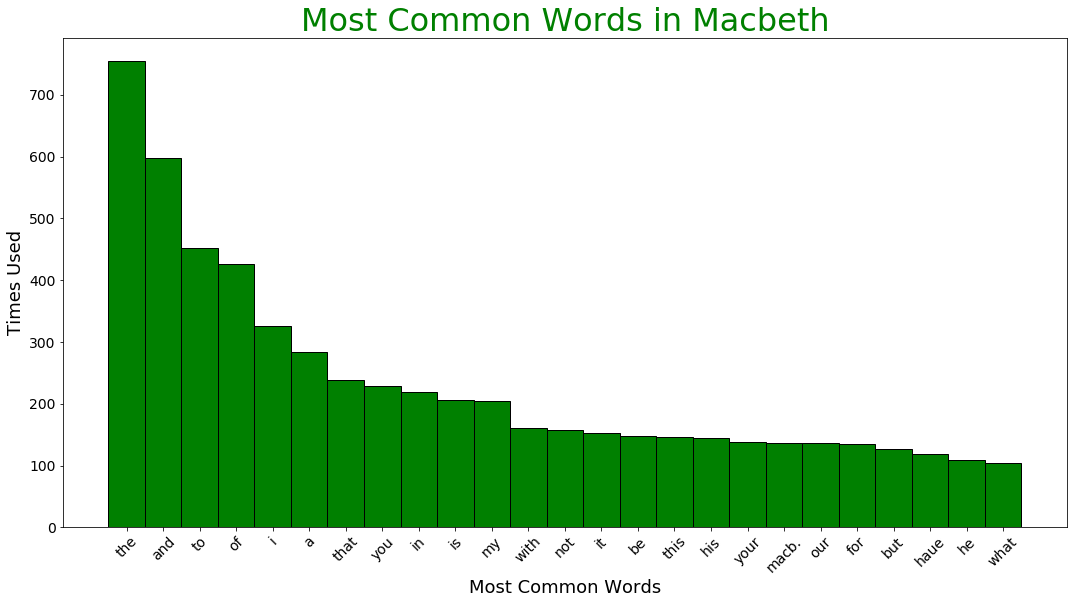

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Your code here

# Pseudo-code outline

# Split the transcript into words
macbeth_split = macbeth.split()

# Create a dictionary
word_count = dict()

# Iterate through the text of Macbeth
for word in macbeth_split:
    # Update word counts
    word = word.lower()
    word_count[word] = word_count.get(word, 0) + 1
    
# Sort words by counts in descending order
word_tups = [(word, count) for word, count in word_count.items()]
word_tups.sort(key=lambda x: x[1], reverse=True)
 
# Create Bar Graph
top_25 = word_tups[:25]
xvalues = [word for word, count in top_25]
yvalues = [count for word, count in top_25]

plt.figure(figsize=(18, 9))
plt.bar(xvalues, yvalues, width=1, color='green', edgecolor='black')

# Include descriptive titles and labels
plt.xlabel('Most Common Words', fontdict={'fontsize': 18})
plt.ylabel('Times Used', fontdict={'fontsize': 18})
plt.title('Most Common Words in Macbeth', fontdict={'fontsize': 32}, color='green')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.show()

## Level Up (Optional)
This project should take you about an hour and a half to complete. If you're done much more quickly than that and are not behind in the course, feel free to deepen your knowledge by completing any or all of the following tasks until you run out of time:
* Create a list of top characters by mentions of their names 
* Split the text by which character is talking
* Create subgraphs of the most common words by character
* Reduce the string to the text of the play itself. (Remove any initial notes, forward, introduction, appendix, etc.)
* Come up with some other fun analyses of the text!

## Summary
Congratulations! You've got some extra practice combining various data types into useful programming patterns and done an initial analysis of a classic text!

In [3]:
# maybe_characters = {}
# for word in macbeth_split:
#     if word.endswith('.') and word[0].isupper() or word == '1.' or word == '2.' or word == '3.':
#         maybe_characters[word] = maybe_characters.get(word, 0) + 1
        
# charactercount = [(word, count) for word, count in maybe_characters.items()]
# charactercount.sort(key=lambda x: x[1], reverse=True)

# characters = [character[0] for character in charactercount]

# junk = ['DEVELOPED.',
#         'University).',
#         'P.',
#         'O.',
#         'S.',
#         'Gutenberg.',
#         'S.',
#         'DAMAGES.',
#         'PURPOSE.',
#         'Defect.',
#         'University".',
#         'Barnardo.',
#         'Fran.',
#         'Bar.',
#         'Shakespeare.',
#         'So.',
#         'Macbeth.',
#         'S.',
#         'Shakespeare.',
#         'Primus.',
#         'Prima.',
#         'Lightning.',
#         'Witches.',
#         'Exeunt.',
#         'Secunda.',
#         'Captaine.'
# ]
# for j in junk:
#     if j in characters:
#         characters.remove(j)

In [4]:
# speaking_lines = []
# line = ''

# for word in macbeth_split:
#     if word in characters:
#         speaking_lines.append(line) # finish the last 'line'
#         line = ''
        
#     line += word + ' '

# for line in speaking_lines[1:]:
#     print(line)

In [5]:
"""Get characters"""
new_line_replaced_macb = macbeth.replace('\r\n', '\\\\')
m_split_line = new_line_replaced_macb.split('\\\\')

char_dct = {}
for section in m_split_line:
    if section.startswith((' ', '\t')): # each time a character speaks, the line starts with whitespace
        split_sect = section.split()
        char = split_sect[0]
        if char.endswith('.'): # each character name ends with a '.'
            char_dct[char] = char_dct.get(char, 0) + 1
            
charactercount = [(word, count) for word, count in char_dct.items()]
charactercount.sort(key=lambda x: x[1], reverse=True)

characters = [character[0] for character in charactercount]

characters.remove('Banquo.') # counted twice - 'Banq.'

stupid_example_characters = ['Barnardo.', 'Fran.', 'Bar.']
for example in stupid_example_characters:
    characters.remove(example)
# characters

In [6]:
"""Print a 'script' copy of Macbeth. Shows each character's line."""

speaking_lines = []
line = ''

for word in macbeth_split:
    if word in characters: # start a new line here
        speaking_lines.append(line) # finish the last 'line'
        line = ''
    elif word in ['Actus', 'Enter', 'Exeunt.']: # add 'commentish' note to stage instructions
        speaking_lines.append(line)
        line = ''
        line += '///// '
    line += word + ' ' # add the word to the new line
    
def print_script(script):
    for line in script[1:]: # excluding the first intro paragraph
        print(line)
        print()

print_script(speaking_lines)

///// Actus Primus. Scoena Prima. Thunder and Lightning. 

///// Enter three Witches. 

1. When shall we three meet againe? In Thunder, Lightning, or in Raine? 

2. When the Hurley-burley's done, When the Battaile's lost, and wonne 

3. That will be ere the set of Sunne 

1. Where the place? 

2. Vpon the Heath 

3. There to meet with Macbeth 

1. I come, Gray-Malkin 

All. Padock calls anon: faire is foule, and foule is faire, Houer through the fogge and filthie ayre. 

///// Exeunt. Scena Secunda. Alarum within. 

///// Enter King, Malcome, Donalbaine, Lenox, with attendants, meeting a bleeding Captaine. 

King. What bloody man is that? he can report, As seemeth by his plight, of the Reuolt The newest state 

Mal. This is the Serieant, Who like a good and hardie Souldier fought 'Gainst my Captiuitie: Haile braue friend; Say to the King, the knowledge of the Broyle, As thou didst leaue it 

Cap. Doubtfull it stood, As two spent Swimmers, that doe cling together, And choake their Art: 

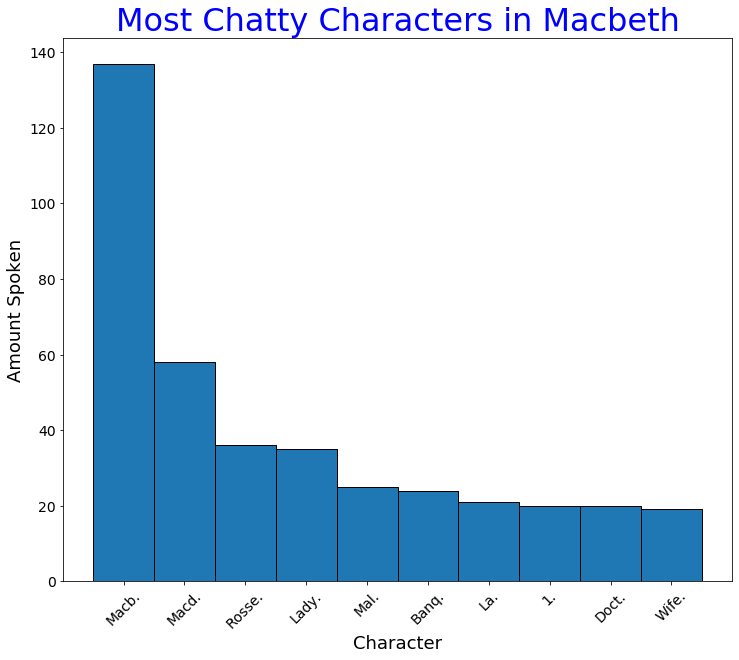

In [7]:
plt.figure(figsize=(12, 10))
top_10_characters = [c[0] for c in charactercount[:10]]
top_10_count = [c[1] for c in charactercount[:10]]

plt.bar(top_10_characters, top_10_count, width=1, edgecolor='black')

# Include descriptive titles and labels
plt.xlabel('Character', fontdict={'fontsize': 18})
plt.ylabel('Amount Spoken', fontdict={'fontsize': 18})
plt.title('Most Chatty Characters in Macbeth', fontdict={'fontsize': 32}, color='blue')
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

plt.show()

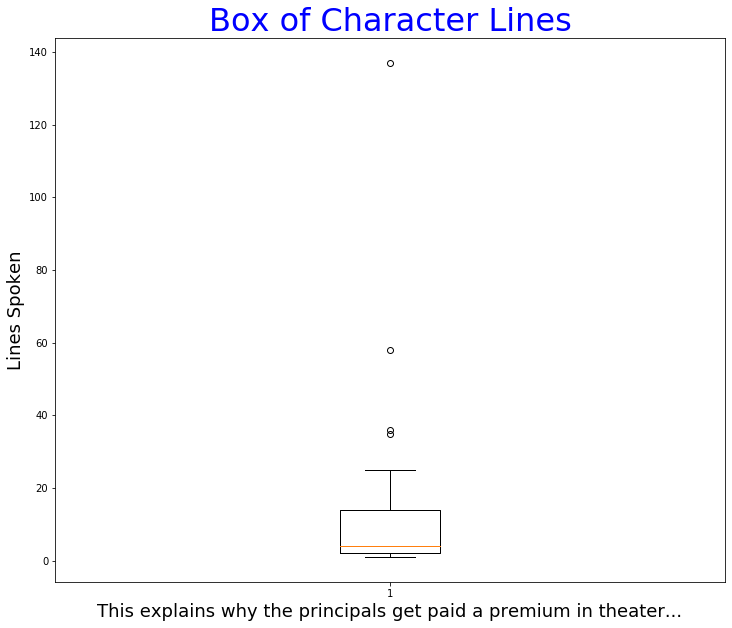

In [8]:
plt.figure(figsize=(12, 10))
plt.boxplot([x[1] for x in charactercount])
plt.title('Box of Character Lines', fontdict={'fontsize': 32}, color='blue')
plt.ylabel('Lines Spoken', fontdict={'fontsize': 18})
plt.xlabel('This explains why the principals get paid a premium in theater...', fontdict={'fontsize': 18})
plt.show()

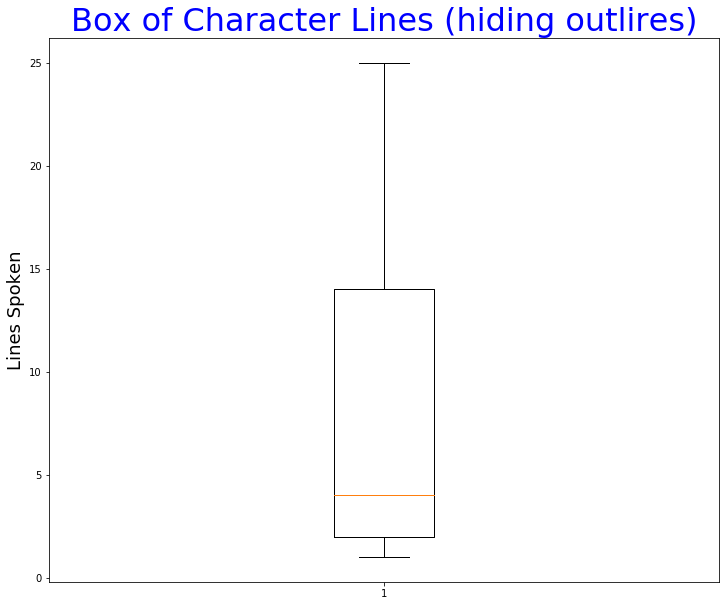

In [9]:
plt.figure(figsize=(12, 10))
plt.boxplot([x[1] for x in charactercount], showfliers=False)
plt.title('Box of Character Lines (hiding outlires)', fontdict={'fontsize': 32}, color='blue')
plt.ylabel('Lines Spoken', fontdict={'fontsize': 18})
plt.show()